<a href="https://colab.research.google.com/github/ch3rnoalpha/Sales_predictions---john-paredes/blob/main/Project_core_1_John_paredes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project core 2

John paredes

In [2]:
#imports drive and mounts it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#imports pandas as 'pd'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#sets filepath as file name and creates dataframe
filename = '/content/drive/MyDrive/CodingDojo/Data files/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#shows the shape of the dataframe
df.shape

(8523, 12)

In [6]:
#shows data types
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
#drops duplicates
df.drop_duplicates(subset =["Item_Identifier"], keep ='last', inplace = True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1155,FDO33,14.750,Low Fat,0.089686,Snack Foods,115.3518,OUT018,2009,Medium,Tier 3,Supermarket Type2,1821.6288
1271,FDY43,14.850,Low Fat,0.098803,Fruits and Vegetables,169.7474,OUT018,2009,Medium,Tier 3,Supermarket Type2,673.7896
1349,FDY58,11.650,Low Fat,0.039981,Snack Foods,227.3694,OUT049,1999,Medium,Tier 1,Supermarket Type1,4567.3880
1567,FDR03,15.700,Regular,0.008734,Meat,207.8980,OUT035,2004,Small,Tier 2,Supermarket Type1,3095.9700
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [8]:
#shows thats null
df.isnull().sum()

Item_Identifier                0
Item_Weight                  286
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  414
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [9]:
#fills missing data with mean for integer based colum, then verifys it was filled
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)
print(df.isnull().sum())

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  414
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64


In [10]:
#shows unique values for outlet size column
df['Outlet_Size'].unique()

array(['Medium', 'Small', nan, 'High'], dtype=object)

In [11]:
#fills missing strings with new catagory then verifys data is filled
df['Outlet_Size'].fillna(('unknown'), inplace = True)
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [12]:
#shows sum of unique values per column
df.nunique()

Item_Identifier              1559
Item_Weight                   383
Item_Fat_Content                5
Item_Visibility              1455
Item_Type                      16
Item_MRP                     1443
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            1231
dtype: int64

In [13]:
#shows datatypes of all comuns
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [14]:
#Goes through data. setting all strings to lowercase to get rid of inconsistent categories of data
for col in df.columns:
  if df[col].dtypes == object:
    df[col] = df[col].str.lower()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,fdn52,12.731563,regular,0.130933,frozen foods,86.9198,out027,1985,medium,tier 3,supermarket type3,1569.9564
1155,fdo33,14.750000,low fat,0.089686,snack foods,115.3518,out018,2009,medium,tier 3,supermarket type2,1821.6288
1271,fdy43,14.850000,low fat,0.098803,fruits and vegetables,169.7474,out018,2009,medium,tier 3,supermarket type2,673.7896
1349,fdy58,11.650000,low fat,0.039981,snack foods,227.3694,out049,1999,medium,tier 1,supermarket type1,4567.3880
1567,fdr03,15.700000,regular,0.008734,meat,207.8980,out035,2004,small,tier 2,supermarket type1,3095.9700
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,fdf22,6.865000,low fat,0.056783,snack foods,214.5218,out013,1987,high,tier 3,supermarket type1,2778.3834
8519,fds36,8.380000,regular,0.046982,baking goods,108.1570,out045,2002,unknown,tier 2,supermarket type1,549.2850
8520,ncj29,10.600000,low fat,0.035186,health and hygiene,85.1224,out035,2004,small,tier 2,supermarket type1,1193.1136
8521,fdn46,7.210000,regular,0.145221,snack foods,103.1332,out018,2009,medium,tier 3,supermarket type2,1845.5976


In [15]:
df.select_dtypes('object').value_counts() 

Item_Identifier  Item_Fat_Content  Item_Type     Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
dra12            low fat           soft drinks   out010             unknown      tier 3                grocery store        1
fdv10            regular           snack foods   out019             small        tier 1                grocery store        1
fdv36            low fat           baking goods  out027             medium       tier 3                supermarket type3    1
fdv35            low fat           breads        out018             medium       tier 3                supermarket type2    1
fdv34            regular           snack foods   out013             high         tier 3                supermarket type1    1
                                                                                                                           ..
fdj16            low fat           frozen foods  out017             unknown      tier 2                supermarket type1   

In [16]:
#====================================================================================================================================

In [17]:
#checks for catagorical data errors

In [18]:
df['Item_Identifier'].value_counts() 

fdn52    1
fdp57    1
ncl41    1
fdz56    1
fdg10    1
        ..
nco43    1
ncn19    1
fdf14    1
fdu33    1
drg01    1
Name: Item_Identifier, Length: 1559, dtype: int64

In [19]:
df['Item_Fat_Content'].value_counts() 

low fat    949
regular    530
lf          59
reg         21
Name: Item_Fat_Content, dtype: int64

In [20]:
df['Item_Type'].value_counts() 

snack foods              220
fruits and vegetables    220
household                170
frozen foods             155
dairy                    125
canned                   120
baking goods             119
health and hygiene        95
meat                      80
soft drinks               80
breads                    45
hard drinks               40
starchy foods             30
others                    30
breakfast                 20
seafood                   10
Name: Item_Type, dtype: int64

In [21]:
df['Outlet_Identifier'].value_counts() 

out049    198
out027    179
out046    178
out017    171
out018    168
out013    158
out035    157
out045    152
out019    107
out010     91
Name: Outlet_Identifier, dtype: int64

In [22]:
df['Outlet_Size'].value_counts() 

medium     545
small      442
unknown    414
high       158
Name: Outlet_Size, dtype: int64

In [23]:
df['Outlet_Location_Type'].value_counts() 

tier 3    596
tier 1    483
tier 2    480
Name: Outlet_Location_Type, dtype: int64

In [24]:
df['Outlet_Type'].value_counts() 

supermarket type1    1014
grocery store         198
supermarket type3     179
supermarket type2     168
Name: Outlet_Type, dtype: int64

In [25]:
#====================================================================================================================================

In [26]:
# corrects catagorical data errors

In [27]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('lf', 'low fat');

In [28]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'regular');

In [29]:
#====================================================================================================================================

In [30]:
#prints info on colums that are numerical (float or int)
for col in df.columns:
  if df[col].dtypes == float or  df[col].dtypes == int:
    print(df[col].describe())


count    1559.000000
mean       12.731563
std         4.191461
min         4.555000
25%         9.300000
50%        12.731563
75%        15.700000
max        21.350000
Name: Item_Weight, dtype: float64
count    1559.000000
mean        0.065673
std         0.051254
min         0.000000
25%         0.026850
50%         0.053280
75%         0.094078
max         0.306543
Name: Item_Visibility, dtype: float64
count    1559.000000
mean      141.018184
std        62.132281
min        32.090000
25%        94.094900
50%       142.778600
75%       185.859500
max       266.022600
Name: Item_MRP, dtype: float64
count    1559.000000
mean     1997.679923
std         8.399954
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64
count     1559.000000
mean      2181.598972
std       1688.913659
min         33.290000
25%        800.291600
50%       1831.615800
75%       3189.847800
max      10072.888200
N

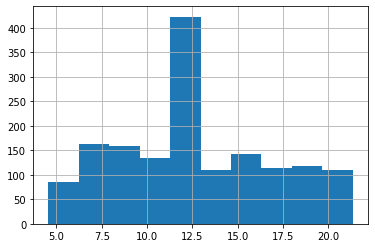

In [31]:
# Histogram of item weights
df['Item_Weight'].hist()
plt.ticklabel_format(useOffset=False, style='plain')

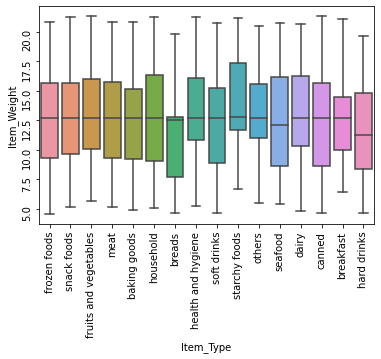

In [32]:
#Boxplot of item type compared to item weight, shows overall averages
ax = sns.boxplot(x='Item_Type', y='Item_Weight', data=df)
ax.tick_params(labelrotation=90)

In [33]:
#creates a correlation chart of all numerical imputs for the df
corr = df.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.022245,0.028789,0.000147,0.020968
Item_Visibility,-0.022245,1.000000,0.007386,-0.075027,-0.118001
Item_MRP,0.028789,0.007386,1.000000,-0.017667,0.555175
Outlet_Establishment_Year,0.000147,-0.075027,-0.017667,1.000000,-0.036093
Item_Outlet_Sales,0.020968,-0.118001,0.555175,-0.036093,1.000000


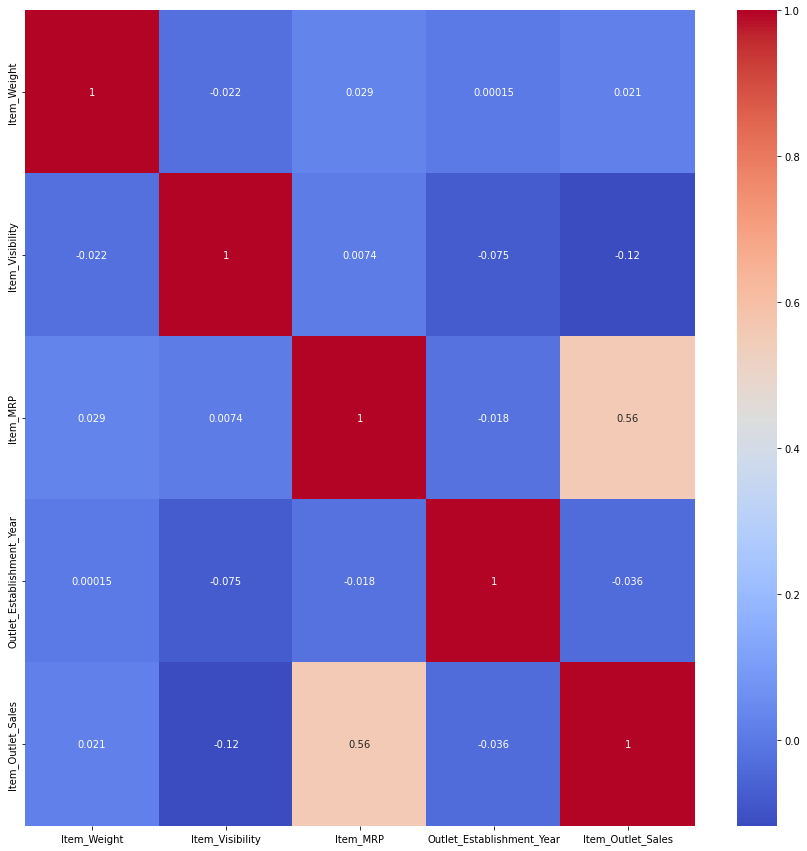

In [34]:
#creates a basic heatmap comparing numerical datapoints, looks for correlations
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [35]:
#creates a mean index of outlet year established
line_df = df.groupby('Outlet_Establishment_Year').mean()
line_df

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
Outlet_Establishment_Year,,,,
1985,12.731563,0.075657,144.648819,2397.759973
1987,13.112152,0.060211,139.362611,2357.370248
1997,12.614719,0.060083,144.489967,2283.301253
1998,11.885330,0.103158,148.333345,325.634732
1999,12.832879,0.059434,140.053902,2341.191546
2002,12.019539,0.058298,127.918280,1982.809343
2004,12.900478,0.063028,138.506581,2456.857130
2007,13.287339,0.058318,135.992039,2249.087974
2009,12.757054,0.063420,149.205490,2211.696449


Text(0.5, 1.0, 'Sales compared to Outlet established year')

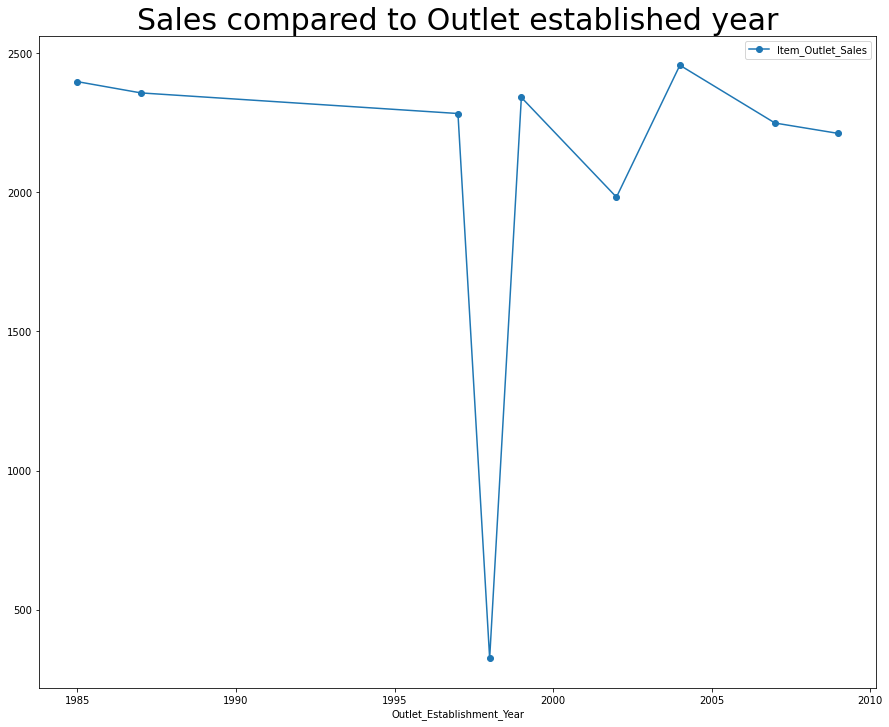

In [66]:
#Plots item sales vs outlet year established
line_df.plot(y=['Item_Outlet_Sales'], subplots=True, marker='o', figsize=(15,12));
plt.title('Sales compared to Outlet established year', fontsize=30)

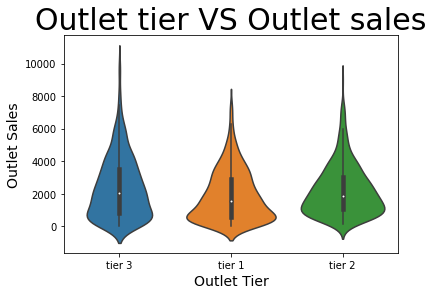

In [73]:
#creates violin boxplot to show outlet tier vs sales
boxplot = sns.violinplot(data=df, x='Outlet_Location_Type',y='Item_Outlet_Sales')


boxplot.axes.set_title("Outlet tier VS Outlet sales", fontsize=30)
boxplot.set_ylabel("Outlet Sales", fontsize=14)
boxplot.set_xlabel("Outlet Tier", fontsize=14);